In [170]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models
from keras import layers
from keras import utils
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist

In [171]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**Завантажуємо готовий датасет вбудований в Керас та дивимось на кількість даних в тренувальній та тестовій частинах, бачимо що в тестовій частині 60000 екземплярів та в тренувальній 10000; кожне зображення 28*28**

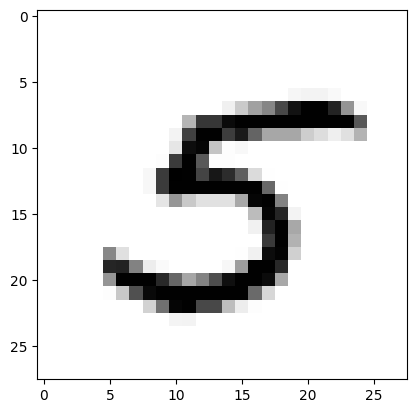

In [172]:
random_nr = np.random.randint(0, 60000)

plt.imshow(X_train[random_nr], cmap="Greys");

**За допомогою функції imshow в matplotlib.pyplot ми можемо перетворити векторне зображення на зрозуміле зображення**

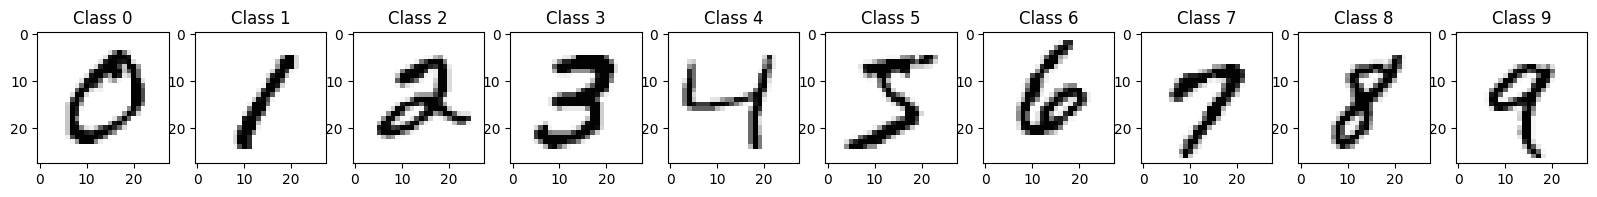

In [173]:
num_classes = 10

fig, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="Greys")
  ax[i].set_title(f"Class {i}")

**Продивляємося приклади кожного класу щоб впевнетись в правильності розподілу, імпорту і тд**

In [174]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


**Робимо таргети категоріальними та впевнюємося, що для кожного класу значення 1(True) буде унікальним, декілька класів не пересікаються**

In [175]:
X_train = X_train/255.0
X_test = X_test/255.0

print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(X_train.shape)


(60000, 28, 28)
(60000, 784)


**Спочатку діленням на 255 ми нормалізуємо фічі від 0 до 1 як MinMaxScaler, бо 255 - максимальне значення насиченості в RGB. Потім зменшуємо розмірність за допомогою reshape до вектора**

In [180]:
#instanitiating the model
model = Sequential()

model.add(keras.Input(shape=(784,)))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

**Обрав sequential модель з 128 нейронами на першому денс шарі та 10 на другому; активація РеЛу та Софтмакс; loss - categorical_crossentropy так як мульти класс класифікація та таргет категоріальний, одній відповіді може дорівнювати лише 1 класс таргету; оптимайзер - адам**

In [198]:
BATCH_SIZE = 512
epochs = 10
model.fit(x=X_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0064
Epoch 2/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0048
Epoch 3/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0062
Epoch 4/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0055
Epoch 5/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0047
Epoch 6/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9978 - loss: 0.0069
Epoch 7/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9975 - loss: 0.0063
Epoch 8/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9981 - loss: 0.0059
Epoch 9/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0063
Epoch 10/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9979 - loss: 0.0062
Epoch 11/11
118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9977 - loss: 0.0058


**Треную модель на Mini-batch mode, найкращими параметрами в середньому виявилися batch size 512 та 10-а епоха**

In [199]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 1.0000 - loss: 1.9243e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.9790 - loss: 0.1316
Train Loss: 0.00022488791728392243, Train Accuracy: 0.9999833106994629
Test Loss: 0.1138286367058754, Test Accuracy: 0.9819999933242798


**Модель доволі стабільна на тестових даних, accuracy score майже одиниця**

In [201]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

print(f"Softmax predicted probability: {y_pred}")

print(f"Probability based answer: {y_pred_classes}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step
Softmax predicted probability: [[8.7034923e-20 1.4061767e-21 1.2911132e-15 ... 1.0000000e+00
  6.7283828e-21 6.1149795e-15]
 [6.9611360e-29 9.3463765e-16 1.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.6520258e-16 9.9999988e-01 3.1071821e-08 ... 5.2408002e-09
  3.0086273e-08 2.0628893e-19]
 ...
 [9.0071830e-35 2.8371782e-35 5.5897121e-31 ... 5.0499927e-11
  6.1304759e-19 1.5950624e-12]
 [0.0000000e+00 3.2248185e-28 4.7453601e-30 ... 2.5697918e-30
  3.4809492e-11 1.4245844e-34]
 [5.9363209e-23 0.0000000e+00 1.2143316e-17 ... 1.5520280e-33
  1.4315710e-30 3.4144846e-32]]
Probability based answer: [7 2 1 ... 4 5 6]


**Дивимося розподіл вірогідностей та відповіді Софтмаксу згідно них**

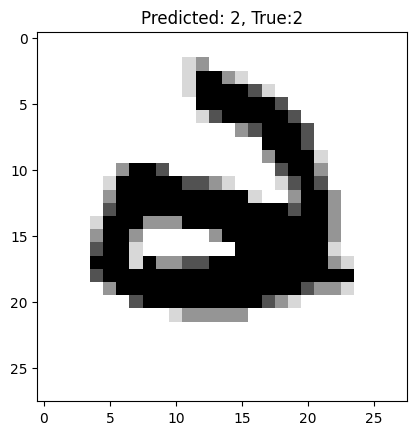

In [296]:
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

y_sample_pred_class = y_pred_classes[random_num]

plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="Greys");

**Дивимось на окремі випадки предиктів, майже завжди модель спрацьовує правильно, але є небагато виключень протестувавши багато екземплярів**

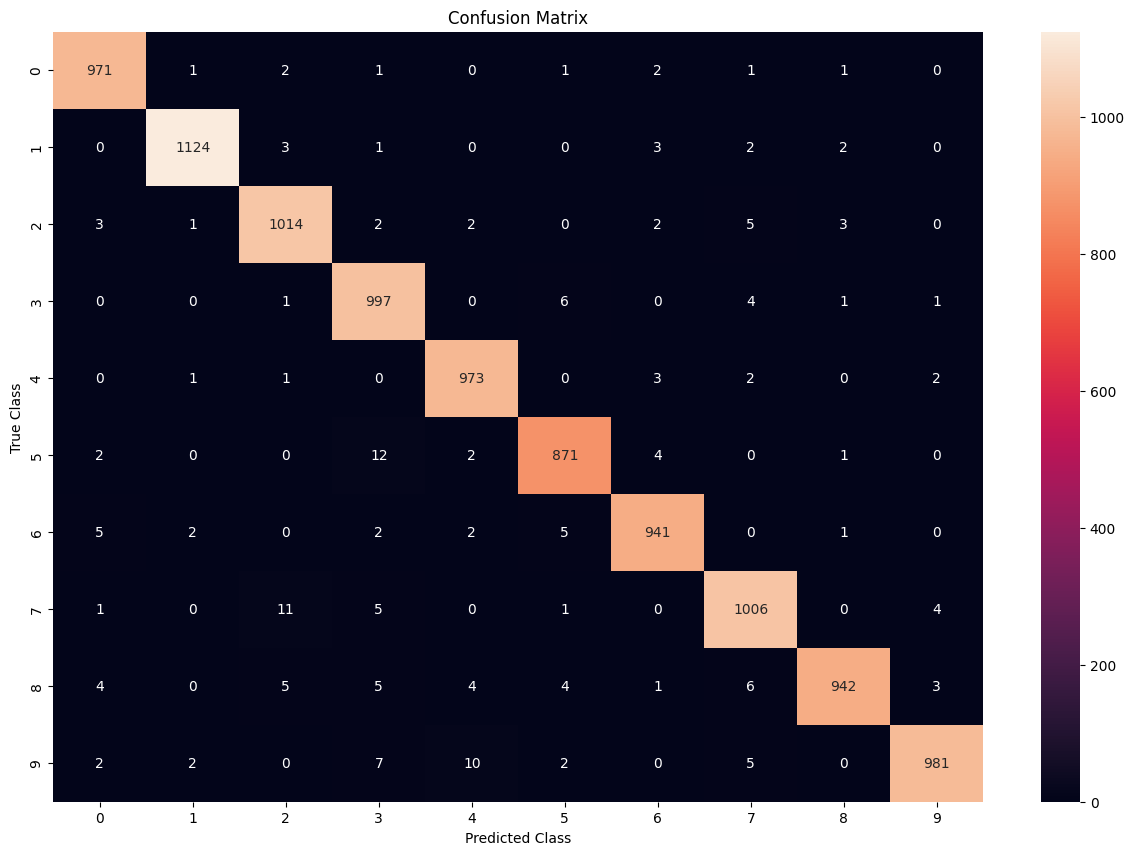

In [298]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax)
ax.set_xlabel("Predicted Class")
ax.set_ylabel("True Class")
ax.set_title("Confusion Matrix");

**За допомогою confusion matrix можна побачити співвідношення вгаданих класів, видно, що найбільше проблем з 5, але в цілому статистика позитивна**